# microRNA scoring

This is the way that I evaluate my microRNAs
For this I am using the DE results with the log fold change
The impact of the microRNAs on the genes
The prescence of the genes in the muscle, and
The pathwyas of the genes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.colors as mcolors
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cityblock
from sklearn.cluster import SpectralClustering


In [2]:
from jupyter_functions import *

In [3]:
pwd

'/home/karen/Documents/GitHub/Muscle_wasting/network'

First we get the influence.
It is define as lists with +1 if it promotes the gene and -1 if it inhibits.
This already includes the pre selection of mirnas by pagerank and influence in general.
It has the genes on the columns and the rows are the microRNAs. The column final has the total of times the microRNA gets to a gene. 

In [4]:
influence_df = pd.read_csv(f"../data/mirna_influence_559_mirnas_673_genes_impact.csv", index_col=0)

In [5]:
influence_df

,CYP7A1,RXRA,MFN2,FOXA3,HSF2,KCTD16,IFT88,MED1,TFPI2,FUT4,...,MATK,PGK1,BDNF,MCM5,BRCA1,E2F2,TNFSF13B,FATE1,BCL6,HDAC2
hsa-miR-21-5p,"[1, 1, -1, 1]","[-1, -1]",[1],[1],"[1, 1]",[-1],NaN,"[1, 1, 1, 1]","[-1, 1, 1]",[1],...,[1],"[1, 1, 1]","[1, 1, 1, 1, 1, -1, 1, -1]","[-1, -1]","[-1, 1, -1, 1, -1, 1, 1, 1, 1, -1]",NaN,"[1, 1, 1, 1, 1, 1, 1]","[1, 1]","[1, 1, -1, 1, -1, 1, -1]","[-1, 1, 1]"
hsa-miR-210-3p,"[1, 1, 1, -1]","[-1, -1]",[1],[-1],"[1, 1]",[-1],NaN,"[1, 1, 1, 1]","[-1, -1, 1]",[-1],...,[1],"[1, 1, -1]","[-1, 1, 1, -1, 1, 1, -1, -1]","[-1, -1]","[-1, 1, 1, -1, 1, 1, -1, -1, -1, -1]",NaN,"[-1, 1, -1, 1, 1, 1, 1]","[1, -1]","[-1, -1, 1, -1, 1, -1, -1]","[-1, 1, -1]"
hsa-miR-145-5p,"[-1, -1, -1, 1]","[1, 1]",[-1],[-1],"[-1, -1]",[1],NaN,"[-1, -1, -1, -1]","[-1, 1, -1]",[-1],...,[-1],"[1, -1, -1]","[-1, 1, -1, -1, -1, -1, 1, -1]","[1, -1]","[-1, 1, -1, 1, -1, 1, -1, -1, -1, -1]",NaN,"[1, -1, -1, -1, -1, -1, -1]","[-1, 1]","[-1, -1, 1, 1, 1, -1, -1]","[-1, -1, 1]"
hsa-miR-143-3p,"[-1, -1, -1, 1]","[1, 1]",[-1],[-1],"[-1, -1]",[1],NaN,"[-1, -1, -1, -1]","[-1, 1, -1]",[-1],...,[-1],"[1, -1, -1]","[-1, 1, -1, -1, -1, -1, 1, -1]","[1, -1]","[-1, -1, 1, -1, 1, -1, -1, -1, -1, -1]",NaN,"[1, -1, -1, -1, -1, -1, -1]","[-1, -1]","[-1, -1, 1, 1, 1, -1, -1]","[1, -1, -1]"
hsa-miR-122-5p,[-1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-3064-5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa-miR-645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa-miR-100-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa-miR-204-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
influence_df = influence_df.T

Now we get the log fold change of the genes

In [9]:
redulation_df = pd.read_csv('../data/RNAseq_abundance_adjusted_combat_inmose_all_lfc.csv', index_col=0)


In [10]:
redulation_df

,yo,ym,mo,ml_c,ml_s
gene,,,,,
CFH,-0.266518,NaN,NaN,NaN,NaN
SEMA3F,-4.102241,NaN,-3.743393,NaN,NaN
CFTR,-3.346279,NaN,-4.146497,NaN,NaN
RAD52,-0.556749,NaN,NaN,NaN,NaN
MYH16,7.573264,NaN,5.626051,NaN,NaN
...,...,...,...,...,...
Unnamed: 34254,-2.382550,NaN,NaN,NaN,NaN
Unnamed: 34260,-3.038266,NaN,NaN,NaN,NaN
Unnamed: 34273,-2.750935,NaN,-4.449913,NaN,NaN


In [11]:
int_influence_df = get_impact_data(influence_df)

int_influence_df

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-589-5p,hsa-miR-320c,hsa-miR-378b,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p
CYP7A1,2,2,-2,-2,-1,2,-2,-2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RXRA,-2,-2,2,2,NaN,-3,2,2,-2,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MFN2,1,1,-1,-1,NaN,1,-1,-1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FOXA3,1,-1,-1,-1,NaN,-1,-1,-1,1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HSF2,2,2,-2,-2,NaN,2,-2,-2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2F2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TNFSF13B,7,3,-5,-5,NaN,3,-5,-5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FATE1,2,0,0,-2,NaN,0,-2,-2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCL6,1,-3,-1,-1,NaN,-3,-1,0,3,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 3456 genes on the influence_df, and in the de  there are 3555.

We can meassure the desired effect by multiplying the impact (integer) of the microRNA of the gene by the lfc of the gene in the younger state vs the older state.

If the gene is downregulated (negative lfc) in young, that means that the desired impact (in theory) will be to reduce it, therefore we look for a negative impact (inhibition) 
-1 * -1 = 1 

Siminarly, if it is updegulated (positive lfc) we want it to increase (positive impact)
1 * 1 = 1 

Any other combination is undesirable. 


For this, we multiply the lfc for the impact. 

In [10]:
#int_influence_df = int_influence_df.T

In [12]:
int_influence_df = int_influence_df.merge(redulation_df, how='inner', left_index=True, right_index=True)


In [13]:
int_influence_df.drop(columns=['ml_c', 'ml_s'], inplace=True)
int_influence_df = int_influence_df.fillna(0)

We have 4 messurments from this
- Overall (sum)
- yo
- ym
- mo

And we addeded a 5th measuemrnet, how many desiable impact we have. For each cell, we would have a value between 0 and 3, 0 meanning no desiable impacts, and 3 impacting yo, ym and mo as expected.



In [14]:
int_influence_df


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p,yo,ym,mo
MFN2,1,1,-1,-1,0,1,-1,-1,1,1,...,0,0,0,0,0,0,0,0.223858,0.000000,0.000000
IFT88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.341321,0.000000,0.000000
FUT4,1,-1,-1,-1,0,-1,-1,-1,1,-1,...,0,0,0,0,0,0,0,-1.913290,0.000000,0.000000
ABCC2,-2,-2,2,2,0,-2,2,2,-2,-2,...,0,0,0,0,0,0,0,3.764793,8.064190,-4.299398
LPIN1,2,2,0,0,-1,2,0,0,2,2,...,0,0,0,0,0,0,0,0.272336,0.215111,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCM5,-2,-2,0,0,0,-2,0,0,0,-2,...,0,0,0,0,0,0,0,-2.084001,0.000000,-3.362056
BRCA1,2,-2,-4,-6,0,-2,-6,-6,2,-2,...,0,0,0,0,0,0,0,-0.246125,0.000000,0.000000
TNFSF13B,7,3,-5,-5,0,3,-5,-5,5,3,...,0,0,0,0,0,0,0,-0.439002,0.000000,0.000000
FATE1,2,0,0,-2,0,0,-2,-2,0,0,...,0,0,0,0,0,0,0,-5.307061,-4.415793,0.000000


In [15]:
measurements= calculate_measurements(int_influence_df)
for m in measurements:
    display(m.head())

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-589-5p,hsa-miR-320c,hsa-miR-378b,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p
MFN2,1,1,-1,-1,0,1,-1,-1,1,1,...,0,0,0,0,0,0,0,0,0,0
IFT88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FUT4,1,-1,-1,-1,0,-1,-1,-1,1,-1,...,0,0,0,0,0,0,0,0,0,0
ABCC2,-2,-2,2,2,0,-2,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
LPIN1,2,2,0,0,-1,2,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-589-5p,hsa-miR-320c,hsa-miR-378b,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p
MFN2,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IFT88,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FUT4,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCC2,-16.128381,-16.128381,16.128381,16.128381,0.000000,-16.128381,16.128381,16.128381,-16.128381,-16.128381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LPIN1,0.430221,0.430221,0.000000,0.000000,-0.215111,0.430221,0.000000,0.000000,0.430221,0.430221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-589-5p,hsa-miR-320c,hsa-miR-378b,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p
MFN2,0.000000,0.000000,-0.000000,-0.000000,0.0,0.000000,-0.000000,-0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IFT88,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FUT4,0.000000,-0.000000,-0.000000,-0.000000,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCC2,8.598795,8.598795,-8.598795,-8.598795,-0.0,8.598795,-8.598795,-8.598795,8.598795,8.598795,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
LPIN1,0.000000,0.000000,0.000000,0.000000,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-589-5p,hsa-miR-320c,hsa-miR-378b,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p
MFN2,0.223858,0.223858,-0.223858,-0.223858,0.000000,0.223858,-0.223858,-0.223858,0.223858,0.223858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IFT88,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
FUT4,-1.913290,1.913290,1.913290,1.913290,-0.000000,1.913290,1.913290,1.913290,-1.913290,1.913290,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
ABCC2,-7.529586,-7.529586,7.529586,7.529586,0.000000,-7.529586,7.529586,7.529586,-7.529586,-7.529586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LPIN1,0.544673,0.544673,0.000000,0.000000,-0.272336,0.544673,0.000000,0.000000,0.544673,0.544673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-589-5p,hsa-miR-320c,hsa-miR-378b,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p
MFN2,1,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
IFT88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FUT4,0,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ABCC2,1,1,2,2,0,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
LPIN1,2,2,0,0,0,2,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [48]:
get_mirs()

NameError: name 'get_mirs' is not defined

In [16]:
mir_scores=[]
for m in measurements:
    mir_score = m.sum()
    mir_scores.append(mir_score)
mir_scores_df = pd.DataFrame(mir_scores)


All of prevouis considers all the genes, but we want to focous now on those genes that are muscle specific

In [17]:
tissue_data = pd.read_csv("../data/tissue_category_rna_Any_Tissue.tsv", sep='\t',  index_col=0)

In [18]:
tissue_columns = []
for name in tissue_data.columns:
    if 'Tissue RNA - ' in name:
        tissue_columns.append(name)


tissue_data_tissues = tissue_data[tissue_columns]
row_sums = tissue_data_tissues.sum(axis=1)

# Divide each value by the sum of its row
tissue_data_tissues = tissue_data_tissues.div(row_sums, axis=0)


In [19]:
pwd

'/home/karen/Documents/GitHub/Muscle_wasting/network'

In [20]:
tissue_data_tissues.to_csv("../data/gene_tissue_2.csv")

In [21]:
tissue_data_tissues

,Tissue RNA - adipose tissue [nTPM],Tissue RNA - adrenal gland [nTPM],Tissue RNA - amygdala [nTPM],Tissue RNA - appendix [nTPM],Tissue RNA - basal ganglia [nTPM],Tissue RNA - bone marrow [nTPM],Tissue RNA - breast [nTPM],Tissue RNA - cerebellum [nTPM],Tissue RNA - cerebral cortex [nTPM],Tissue RNA - cervix [nTPM],...,Tissue RNA - spinal cord [nTPM],Tissue RNA - spleen [nTPM],Tissue RNA - stomach 1 [nTPM],Tissue RNA - testis [nTPM],Tissue RNA - thymus [nTPM],Tissue RNA - thyroid gland [nTPM],Tissue RNA - tongue [nTPM],Tissue RNA - tonsil [nTPM],Tissue RNA - urinary bladder [nTPM],Tissue RNA - vagina [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000083,0.000083,0.000000,0.000083,0.000000,0.000083,0.000083,0.000000,0.000250,0.000083,...,0.000000,0.000584,0.000083,0.000000,0.000000,0.000083,0.000000,0.000000,0.000000,0.000000
A1CF,0.000000,0.000000,0.000000,0.002079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.035712,0.014485,0.005301,0.011920,0.006890,0.000451,0.023398,0.001573,0.008586,0.018008,...,0.007881,0.019212,0.013624,0.004678,0.004293,0.016107,0.022489,0.004719,0.066852,0.012699
A2ML1,0.000181,0.000091,0.001812,0.000000,0.002265,0.000181,0.003624,0.000544,0.001903,0.102655,...,0.000453,0.000091,0.000634,0.004349,0.002628,0.000091,0.000000,0.045393,0.000997,0.179940
A4GNT,0.002907,0.000000,0.000000,0.000000,0.000000,0.002907,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005814,0.668605,0.000000,0.000000,0.005814,0.000000,0.000000,0.002907,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWILCH,0.012131,0.006885,0.008525,0.026885,0.009836,0.033443,0.021311,0.011475,0.016066,0.015410,...,0.009180,0.017705,0.017705,0.171475,0.045246,0.012459,0.009508,0.044918,0.017377,0.013115
ZWINT,0.006601,0.006093,0.003808,0.038588,0.004316,0.104341,0.015994,0.001015,0.008124,0.009393,...,0.004570,0.012440,0.030972,0.064483,0.107642,0.009647,0.001523,0.081239,0.012186,0.010663
ZXDC,0.018895,0.014382,0.005922,0.016920,0.006486,0.109983,0.017202,0.010998,0.018049,0.021997,...,0.007614,0.024253,0.018613,0.017484,0.027637,0.023407,0.026509,0.016356,0.016638,0.015228


In [22]:
muscle_series = tissue_data_tissues['Tissue RNA - skeletal muscle [nTPM]']
muscle_genes = muscle_series[muscle_series>0.01]
muscle_genes = list(muscle_genes.index)


In [23]:
len(muscle_genes)

3498

In [24]:
#muscle_genes

In [25]:
int_influence_muscle_df=int_influence_df[int_influence_df.index.isin(muscle_genes)]
len(int_influence_muscle_df)

58

In [26]:
int_influence_muscle_df

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p,yo,ym,mo
MFN2,1,1,-1,-1,0,1,-1,-1,1,1,...,0,0,0,0,0,0,0,0.223858,0.000000,0.000000
IFT88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.341321,0.000000,0.000000
LPIN1,2,2,0,0,-1,2,0,0,2,2,...,0,0,0,0,0,0,0,0.272336,0.215111,0.000000
ACSL1,2,-2,2,2,0,-2,2,2,2,-2,...,0,0,0,0,0,0,0,0.414507,0.388890,0.000000
CYCS,1,1,-1,-1,0,1,-1,-1,1,1,...,0,0,0,0,0,0,0,0.540560,0.000000,0.325282
ETFDH,1,-1,1,1,0,-1,1,1,1,-1,...,0,0,0,0,0,0,0,0.289635,0.000000,0.000000
PCYT2,4,4,0,0,0,4,0,0,4,4,...,0,0,0,0,0,0,0,0.389790,0.000000,0.000000
UCP3,1,-3,1,1,0,-3,1,1,1,-3,...,0,0,0,0,0,0,0,0.350788,0.382571,0.000000
MT-CO1,1,1,-1,-1,0,1,-1,-1,1,1,...,0,0,0,0,0,0,0,0.392706,0.000000,0.000000
PFKFB2,1,1,-1,-1,0,1,-1,-1,1,1,...,0,0,0,0,0,0,0,-1.322037,0.000000,0.000000


In [27]:
measurements_muscle= calculate_measurements(int_influence_muscle_df)


In [28]:
measument_names = ['influence_weight', 'influence_weigh_ym', 'influence_weigh_mo', 'influence_weigh_yo', 'influence_quantity']

In [29]:
mir_scores_muscle=[]
for m in measurements_muscle:
    mir_score = m.sum()
    mir_scores_muscle.append(mir_score)
mir_scores_muscle_df = pd.DataFrame(mir_scores_muscle)

In [30]:
mir_scores_muscle_df['score']=measument_names
mir_scores_muscle_df.set_index('score')

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-589-5p,hsa-miR-320c,hsa-miR-378b,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p
score,,,,,,,,,,,,,,,,,,,,,
influence_weight,70.000000,12.000000,-60.000000,-66.000000,1.000000,12.000000,-67.000000,-66.000000,71.000000,14.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000
influence_weigh_ym,34.996379,10.925347,-1.410352,-21.110186,4.709848,10.925347,-21.110186,-21.110186,15.296545,10.925347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
influence_weigh_mo,-0.061908,65.968721,20.647807,13.119933,0.000000,65.968721,16.883870,16.883870,-21.841767,65.968721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
influence_weigh_yo,12.661481,61.157773,63.926209,35.675226,3.886962,61.157773,41.011085,40.524848,-31.798854,60.185298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.172001
influence_quantity,46.000000,41.000000,28.000000,27.000000,5.000000,41.000000,27.000000,26.000000,45.000000,41.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [46]:
mir_scores_muscle_df.to_csv("mir_scores_muscle_df_559.csv", index=True, header=True)

In [31]:
mir_scores_df['score']=measument_names
mir_scores_df.set_index('score')

,hsa-miR-21-5p,hsa-miR-210-3p,hsa-miR-145-5p,hsa-miR-143-3p,hsa-miR-122-5p,hsa-miR-128-3p,hsa-miR-29a-3p,hsa-miR-29b-3p,hsa-miR-181b-5p,hsa-miR-203a-3p,...,hsa-miR-589-5p,hsa-miR-320c,hsa-miR-378b,hsa-miR-1266-5p,hsa-miR-1182,hsa-miR-3064-5p,hsa-miR-645,hsa-miR-100-3p,hsa-miR-204-3p,hsa-miR-488-5p
score,,,,,,,,,,,,,,,,,,,,,
influence_weight,291.000000,45.000000,-297.000000,-307.000000,0.000000,42.000000,-309.000000,-308.000000,336.000000,38.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000
influence_weigh_ym,-5.616192,-159.897814,139.392333,128.524085,9.159280,-159.897814,128.524085,128.524085,-5.017531,-159.897814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
influence_weigh_mo,-172.939246,144.555871,210.613423,203.085549,-3.576164,154.832413,206.849486,206.849486,-291.823388,166.405207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
influence_weigh_yo,-243.060899,-84.658131,449.894075,431.207868,5.544385,-74.659715,436.179523,435.693286,-349.646766,-63.181455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.172001
influence_quantity,140.000000,142.000000,156.000000,157.000000,8.000000,144.000000,157.000000,156.000000,133.000000,144.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


If we do the dot plot only on those in muscle

In [ ]:
plot_dotplot(int_influence_muscle_df.iloc[:, : 10],gene_scale=0.7, mirna_scale=1 )

In [ ]:
int_influence_muscle_df.iloc[:,-3:]

But there are genes on different stages that we may want a different effect.
Therefore, we can see the curve that the gene has.

In [34]:
theshold = 0.5
up_regulated = int_influence_muscle_df[
    (int_influence_muscle_df['ym'] > theshold) | 
    (int_influence_muscle_df['mo'] > theshold) | 
    (int_influence_muscle_df['yo'] > theshold)].copy()


In [35]:

# Add the 'sum' column
up_regulated['sum'] = up_regulated[['yo', 'ym', 'mo']].sum(axis=1)

up_regulated=up_regulated.sort_values(by='sum')
up_regulated.drop(columns=['sum'], inplace=True)
up_regulated[['yo','ym','mo']]

,yo,ym,mo
ALDOA,0.512077,0.000000,0.000000
GYS1,0.563409,0.000000,0.000000
CYCS,0.540560,0.000000,0.325282
COX7C,0.559328,0.000000,0.329616
GAPDH,1.036054,0.642676,0.000000
ARID3A,3.037447,5.408662,0.000000
MGMT,4.000736,4.924959,0.000000


genes 7
mirnas 15


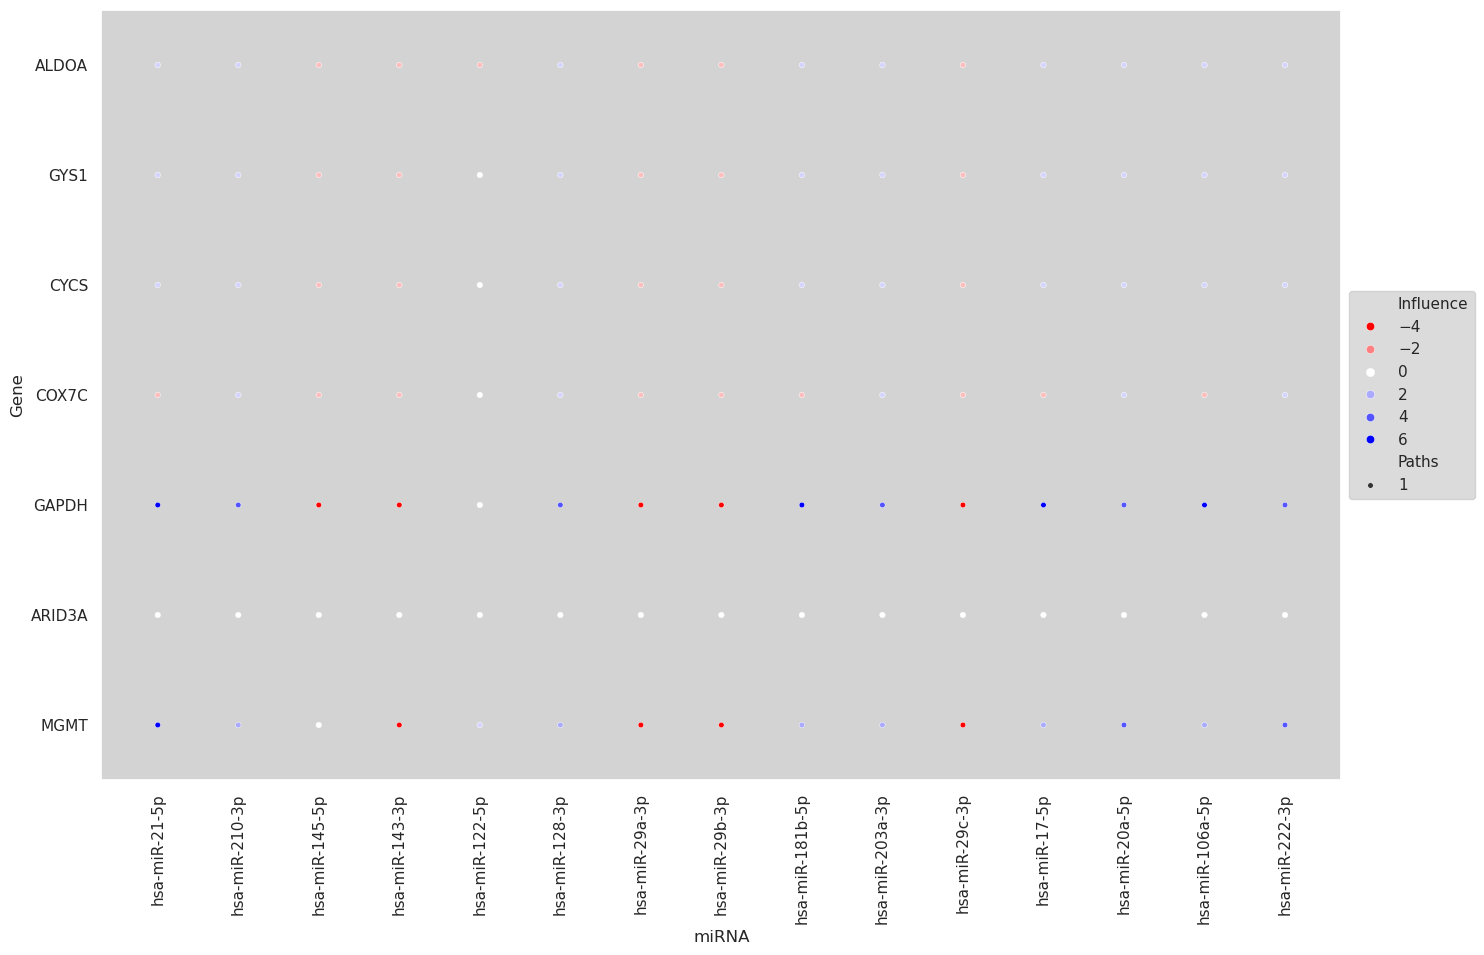

In [36]:
plot_dotplot(up_regulated.iloc[:, : 15],gene_scale=0.7, mirna_scale=1 )

In [37]:
theshold = -2
down_regulated = int_influence_muscle_df[
    (int_influence_muscle_df['ym'] < theshold) 
    | (int_influence_muscle_df['mo'] < theshold) 
    | (int_influence_muscle_df['yo'] < theshold)
]


In [38]:
down_regulated['sum']=down_regulated['yo']+down_regulated['ym']+down_regulated['mo']
down_regulated=down_regulated.sort_values(by='sum')
down_regulated.drop(columns=['sum'], inplace=True)
down_regulated[['yo','ym','mo']]

/tmp/ipykernel_45542/1096668806.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  down_regulated['sum']=down_regulated['yo']+down_regulated['ym']+down_regulated['mo']
/tmp/ipykernel_45542/1096668806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_regulated['sum']=down_regulated['yo']+down_regulated['ym']+down_regulated['mo']


,yo,ym,mo
LPL,-3.763084,0.0,-6.875066
PNPLA2,-3.910201,0.0,-5.557912
MYC,-5.335859,0.0,-3.763937
HPN,-2.461707,0.0,-4.015221
MCM5,-2.084001,0.0,-3.362056
ATP13A2,-4.529734,0.0,0.000000
MAOB,-2.960518,0.0,0.000000
NR4A2,-2.953590,0.0,0.000000
SLC30A2,-2.779430,0.0,0.000000
HIF1AN,-2.185676,0.0,0.000000


genes 10
mirnas 15


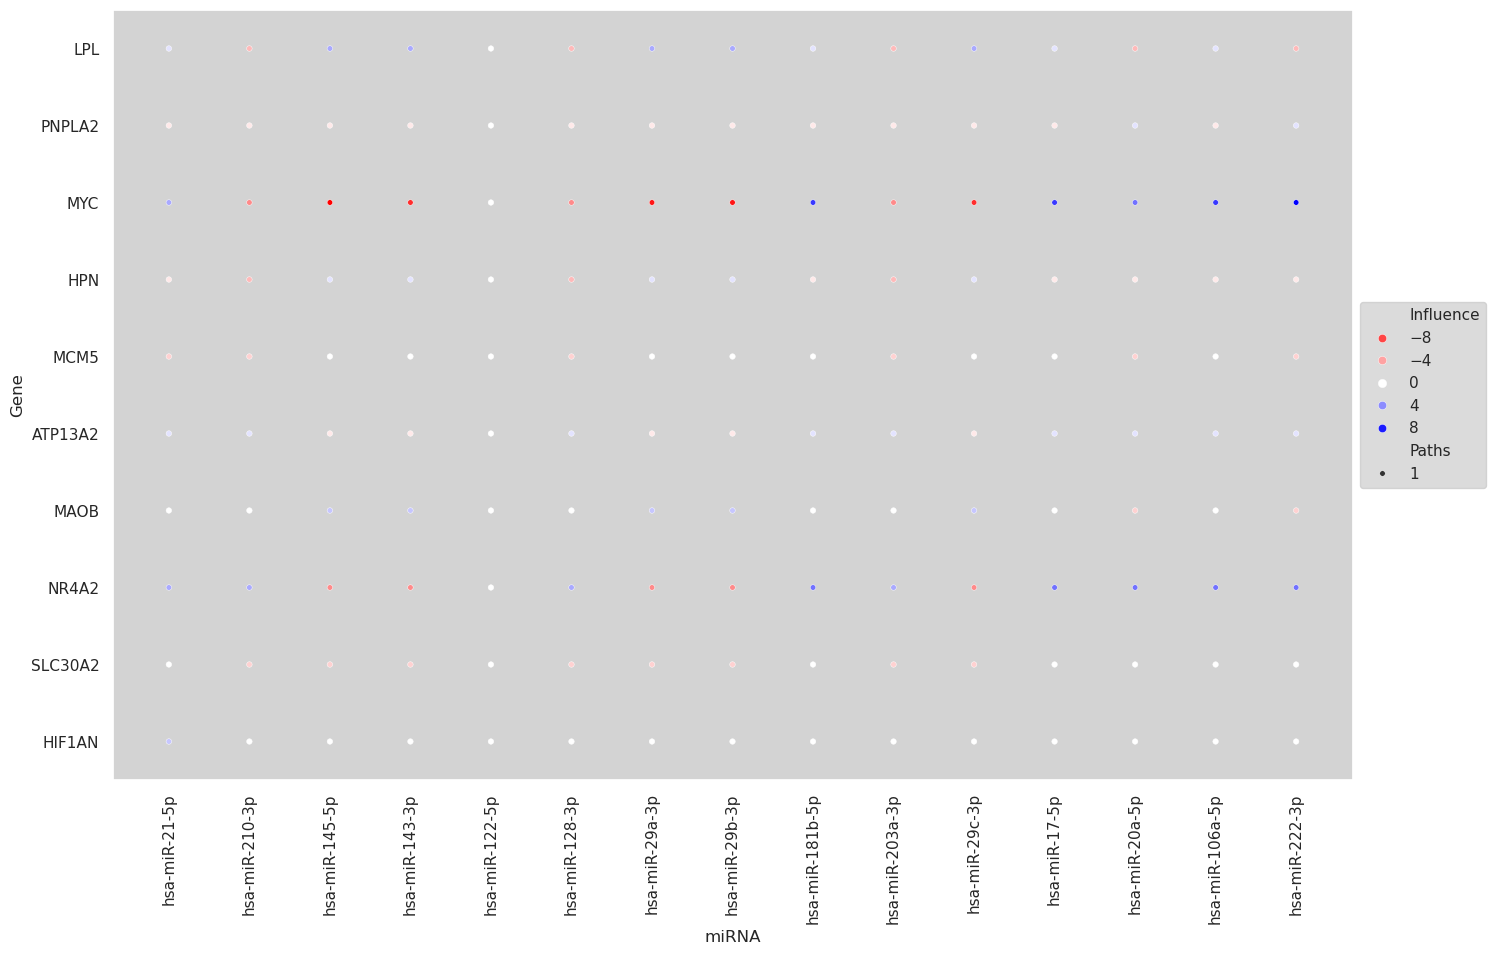

In [39]:
plot_dotplot(down_regulated.iloc[:, : 15],gene_scale=0.7, mirna_scale=1 )

In [40]:
def get_cytoscape_filter_from_list(mirnas_good:list)->str:
    query_mirna = ""
    for mir in mirnas_good:
        query_mirna = query_mirna + f"({mir})|"
    return query_mirna

In [41]:
get_cytoscape_filter_from_list(list(int_influence_muscle_df.columns)[:-3])

'(hsa-miR-21-5p)|(hsa-miR-210-3p)|(hsa-miR-145-5p)|(hsa-miR-143-3p)|(hsa-miR-122-5p)|(hsa-miR-128-3p)|(hsa-miR-29a-3p)|(hsa-miR-29b-3p)|(hsa-miR-181b-5p)|(hsa-miR-203a-3p)|(hsa-miR-29c-3p)|(hsa-miR-17-5p)|(hsa-miR-20a-5p)|(hsa-miR-106a-5p)|(hsa-miR-222-3p)|(hsa-miR-155-5p)|(hsa-miR-34b-5p)|(hsa-miR-200b-3p)|(hsa-miR-107)|(hsa-miR-23a-3p)|(hsa-miR-199a-5p)|(hsa-miR-140-5p)|(hsa-miR-141-3p)|(hsa-miR-200c-3p)|(hsa-miR-24-3p)|(hsa-miR-451a)|(hsa-miR-449a)|(hsa-miR-10a-5p)|(hsa-miR-212-3p)|(hsa-miR-9-5p)|(hsa-miR-15b-5p)|(hsa-miR-101-3p)|(hsa-miR-7-5p)|(hsa-miR-26a-5p)|(hsa-miR-22-3p)|(hsa-miR-30a-5p)|(hsa-miR-138-5p)|(hsa-miR-135a-5p)|(hsa-miR-20b-5p)|(hsa-miR-137)|(hsa-miR-183-5p)|(hsa-miR-218-5p)|(hsa-miR-185-5p)|(hsa-miR-34a-5p)|(hsa-miR-92b-3p)|(hsa-miR-125a-5p)|(hsa-miR-124-3p)|(hsa-miR-150-5p)|(hsa-miR-195-5p)|(hsa-miR-520g-3p)|(hsa-miR-330-3p)|(hsa-miR-494-3p)|(hsa-miR-92a-3p)|(hsa-miR-125b-5p)|(hsa-miR-31-5p)|(hsa-miR-205-5p)|(hsa-miR-199b-5p)|(hsa-miR-223-3p)|(hsa-miR-519c-3p)|(hs